### Import Libraries


**df['Duration'] = df['End_date']-df['Start_date']**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
import missingno
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

%matplotlib inline

#### Load the dataset

In [2]:
churn = pd.read_csv(r'Telco-Customer-Churn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
churn['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [141]:
churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

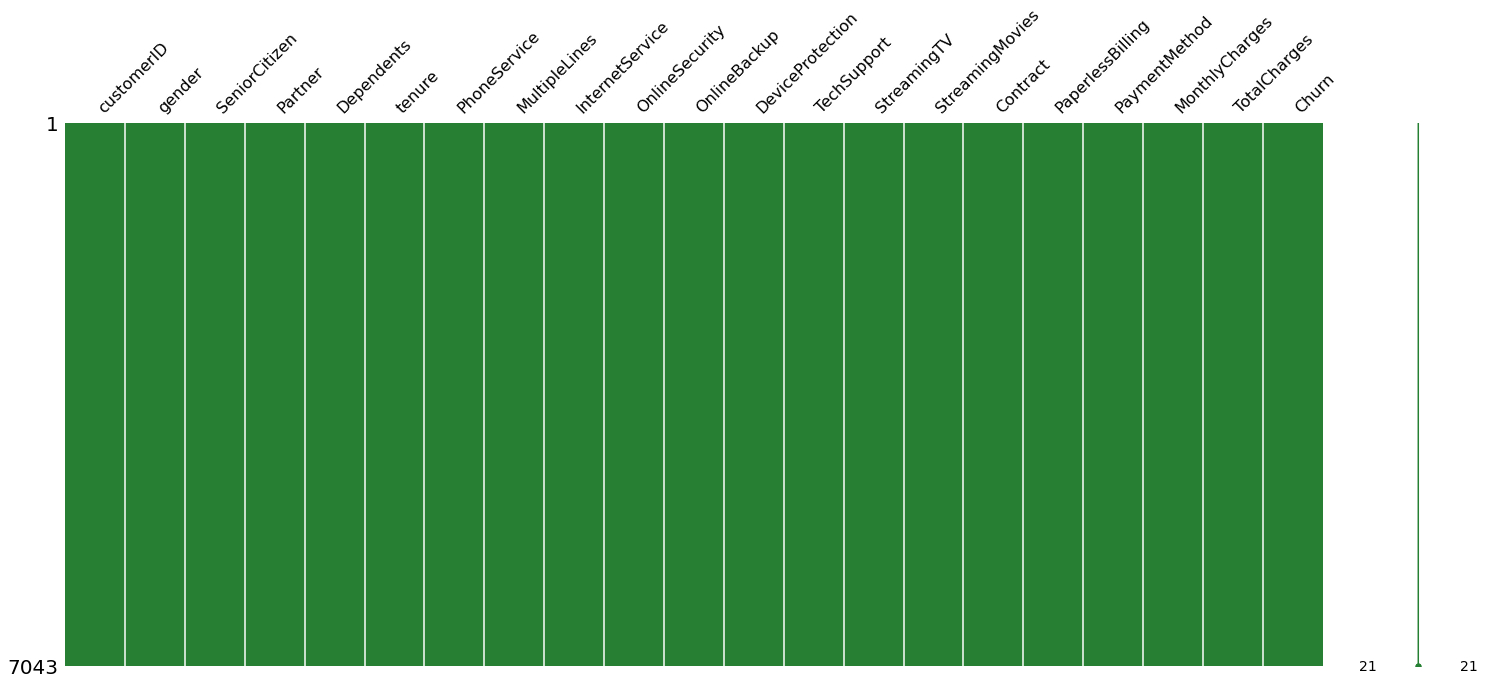

In [6]:
missingno.matrix(churn, color=(0.15, 0.5, 0.2))

#### Initial Observation

1. No missing values in the dataset
2. Dataset contains 20 columns with 7043 row

In [145]:
# replacing all the blank values with NaN 
churn_clean = churn.replace(r'^\s*$', np.nan, regex=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(churn_clean.isnull().sum()))

Missing values (per feature): 
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



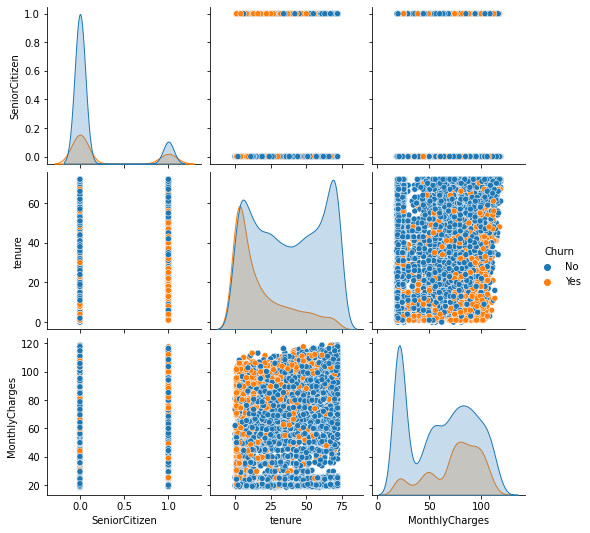

In [24]:
sns.pairplot(data=churn,hue='Churn')

In [49]:
fig = px.bar(churn, x=churn.groupby('Churn')['tenure'].count().index, y=churn.groupby('Churn')['Churn'].count().values, text =churn.groupby('Churn')['Churn'].count(), color=churn.Churn.unique())
fig.update_layout(xaxis_title='Churn', yaxis_title='count', template='plotly_dark')

In [69]:
colors = ['blue', 'green']
fig = px.pie(churn, values=round(churn.Churn.value_counts()*100 / len(churn),2),names=churn.Churn.unique(),
      title='Percentage of Churn')
fig.update_layout(template='plotly_dark')
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo='label+percent', pull=[0.1, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))

#### Observation
1. The churn data is imbalanced. 

In [109]:
gender = churn.groupby(['gender', 'Churn'])['gender'].count().unstack()
gender.reset_index('gender')

Churn,gender,No,Yes
0,Female,2549,939
1,Male,2625,930


In [123]:
iplot(gender.iplot(asFigure=True, kind='bar', title='Churn by Gender', theme='solar', colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Female and Male user almost have the same churn count
2. Gender seems to be not a factor in churn

In [129]:
df = pd.crosstab(churn['SeniorCitizen'],churn['Churn'])
df.reset_index('SeniorCitizen')

Churn,SeniorCitizen,No,Yes
0,0,4508,1393
1,1,666,476


In [130]:
iplot(df.iplot(asFigure=True, kind='bar', title='SeniorCitizen Churn Count', theme='solar'))

#### Obsevation
1. Almost half of the Senior citizen are churning
2. There seems to be a correlation between Senior citizen and churn

In [133]:
df = pd.crosstab(churn['tenure'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar', title='Tenure vs Churn', theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))


#### Observation
1. As the years in tenure increases, less customer are churning

In [139]:
df = pd.crosstab(churn['PaperlessBilling'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='PaperlessBilling vs Churn', theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. There seem to be a correlation between Paperless billing and churn.
2. Customer with Paperless billing tend to churn more that customer with non paperless billing

In [140]:
df = pd.crosstab(churn['PaymentMethod'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='PaymentMethod vs Churn', theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Customer using Electronic check has a higher churn count